<font color = green >

# <center>Homework<center>
</font>

__Exploratory Data Analysis (EDA)__ of car insurance dataset.
    
__Dataset description:__ Car insurance claim. As you are working in the insurance company. Company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer. In this project you are dealing with various feature such as age, occupation etc. based on that let's get back to the final conculsion.    

__Steps:__
- Data Cleaning
- Descriptive Statistics
- Data Visualization
- Conclusions

## Import Python Libraries

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Loading the data into a data frame

In [275]:
claims = pd.read_csv("./datasets/car_insurance_claim.csv")
claims.columns= claims.columns.str.lower()

## Inspecting the data

In [276]:
claims.shape

(10000, 20)

Our dataset has 10000 rows and 20 columns. Let's check the first and last few rows of the dataset using `head()` and `tail()` methods.

In [277]:
claims.head()

,unnamed: 0,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


In [278]:
claims.tail()

,unnamed: 0,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
9995,9995,323164,26-39,female,majority,10-19y,university,upper class,0.5827870696562382,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,9996,910346,26-39,female,majority,10-19y,none,middle class,0.5222314755016938,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,9997,468409,26-39,male,majority,0-9y,high school,middle class,0.4709402314479679,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,9998,903459,26-39,female,majority,10-19y,high school,poverty,0.3641847847297929,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,9999,442696,26-39,female,majority,0-9y,none,working class,0.4352247779429113,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [279]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unnamed: 0           10000 non-null  int64 
 1   id                   10000 non-null  int64 
 2   age                  9950 non-null   object
 3   gender               9950 non-null   object
 4   race                 9951 non-null   object
 5   driving_experience   9950 non-null   object
 6   education            9951 non-null   object
 7   income               10000 non-null  object
 8   credit_score         8978 non-null   object
 9   vehicle_ownership    9950 non-null   object
 10  vehicle_year         9950 non-null   object
 11  married              9952 non-null   object
 12  children             9950 non-null   object
 13  postal_code          9950 non-null   object
 14  annual_mileage       9000 non-null   object
 15  vehicle_type         9951 non-null   object
 16  speed

The majority of columns, excluding `id` and `income`, contain missing values. Columns like `credit_score`, `vehicle_ownership`, `married`, `children`, `annual_mileage`, `speeding_violations`, `duis`, `past_accidents` and `outcome` have `object` datatype instead of `int` or `float`. Also we can delete `unnamed: 0` column as it duplicates indexes.

Let's check unique values in each column.


In [280]:
claims.nunique()

unnamed: 0             10000
id                     10000
age                        5
gender                     3
race                       3
driving_experience         5
education                  3
income                     4
credit_score            8929
vehicle_ownership          3
vehicle_year               3
married                    3
children                   3
postal_code                9
annual_mileage            22
vehicle_type               3
speeding_violations       22
duis                       8
past_accidents            16
outcome                    3
dtype: int64

In [281]:
columns = [column for column in claims.columns if column not in ['id', 'credit_score', 'unnamed: 0', 'postal_code', 'annual_mileage']]
pd.set_option("max_colwidth", 60)
display(claims[columns].apply(lambda col: col.dropna().unique()))
pd.reset_option("max_colwidth")

age                                               [65+, 16-25, 26-39, 40-64, none]
gender                                                        [female, male, none]
race                                                    [majority, minority, none]
driving_experience                              [0-9y, 10-19y, 20-29y, 30y+, none]
education                                          [high school, none, university]
income                         [upper class, poverty, working class, middle class]
vehicle_ownership                                                 [1.0, 0.0, none]
vehicle_year                                       [after 2015, before 2015, none]
married                                                           [0.0, 1.0, none]
children                                                          [1.0, 0.0, none]
vehicle_type                                             [sedan, sports car, none]
speeding_violations    [0, 2, 3, 7, 6, 4, 10, 13, 1, 5, 9, 8, 12, none, 11, 15,...
duis

As observed, the string “none” is present in nearly all columns. Our next step is to replace it with `np.nan`.

Now, let’s generate descriptions for each column, taking into account their names, data types, and the uniqueness of values: 
<br/><br/>

| Column | Description                                                                                                              |
|--------|--------------------------------------------------------------------------------------------------------------------------|
| `id` | unique client identifier                                                                                                 |
| `age` | client's age: <br> <ul><li>16-25</li><li>26-39</li><li>40-64</li><li>65+</li></ul>                                       |
| `gender` | client's gender: <br> <ul><li>female</li><li>male</li></ul>                                                              |
| `driving_experience` | the number of years a client has been driving: <br> <ul><li>0-9</li><li>10-19</li><li> 20-29</li><li>30+</li></ul>       |
| `education` | client's level of education: <br> <ul><li>high school</li><li>university</li></ul>                                       |
| `income` | client's income level: <br> <ul><li>poverty</li><li>working class</li><li>middle class</li><li>upper class</li></ul>     |
| `credit_score` | client's credit score (between zero and one)                                                                             |
| `vehicle_ownership` | client's vehicle ownership status: <br><ul><li>`0`: does not own their vehilce</li><li>`1`: owns their vehicle</li></ul> |
| `vehcile_year` | year of vehicle registration: <br><ul><li>before 2015</li><li> after 2015</li></ul>                                      |
| `married` | client's marital status: <br><ul><li>`0`: not married</li><li>`1`: married</li></ul>                                     |
| `children` | client's children status: <br><ul><li>`0`: does not have children</li><li>`1`: has at least 1 child</li></ul>            |
| `postal_code` | client's postal code                                                                                                     | 
| `annual_mileage` | number of miles driven by the client each year                                                                           |
| `vehicle_type` | type of car: <br> <ul><li>sedan</li><li>sports car</li></ul>                                                             |
| `speeding_violations` | total number of speeding violations received by the client                                                               | 
| `duis` | number of times the client has been caught driving under the influence of of alcohol, drugs, or other substances         |
| `past_accidents` | total number of previous accidents the client has been involved in                                                       |
| `outcome` | whether or not the company provided insurance for the individual: <br><ul><li>`0`: no</li><li>`1`: yes</li></ul>         |


## Data Preparation

### Dropping columns

Columns such as `unnamed: 0`, `id`, `postal_code`, `race` will not be relevant for our analysis, so we can get rid of these.  

In [282]:
claims.drop(['unnamed: 0', 'id', 'postal_code', 'race'], axis=1, inplace=True)

### Missing values
We will start with replacing `"none"` values with `np.nan`

In [283]:
claims.replace('none', np.nan, inplace=True)

#### Updating data type of columns

In [284]:
float_columns = ['credit_score', 'speeding_violations', 'past_accidents', 'outcome', 'vehicle_ownership', 'married', 'children', 'duis', 'children', 'annual_mileage']

for col in float_columns:
    claims[col] = claims[col].astype('float')

Let's check % of missing values in each column. 

In [285]:
(claims.isnull().sum()/(len(claims)))*100.

age                     1.00
gender                  0.99
driving_experience      1.00
education              19.96
income                  0.00
credit_score           10.72
vehicle_ownership       1.00
vehicle_year            1.00
married                 0.98
children                1.00
annual_mileage         10.50
vehicle_type            0.99
speeding_violations     0.99
duis                    1.00
past_accidents          1.00
outcome                 1.00
dtype: float64

We can notice the highest number of missing values in columns such as `education`, `credit_score`, `annual_mileage`. Our initial step should involve filling in these columns. Since we lack information about the client's education, we will replace the missing values with `"unknown"`.

In [286]:
claims['education'].fillna('unknown',inplace=True)

In [287]:
claims.pivot_table(index=['income', 'gender'], values='credit_score', aggfunc='mean')

credit_score
income        gender              
middle class  female      0.538309
              male        0.508387
poverty       female      0.364356
              male        0.330551
upper class   female      0.627135
              male        0.601350
working class female      0.446117
              male        0.417523

In [291]:
claims.pivot_table(index=['married', 'children'], values='credit_score', aggfunc='count')

credit_score
married children              
0.0     0.0               1950
        1.0               2425
1.0     0.0                778
        1.0               3594

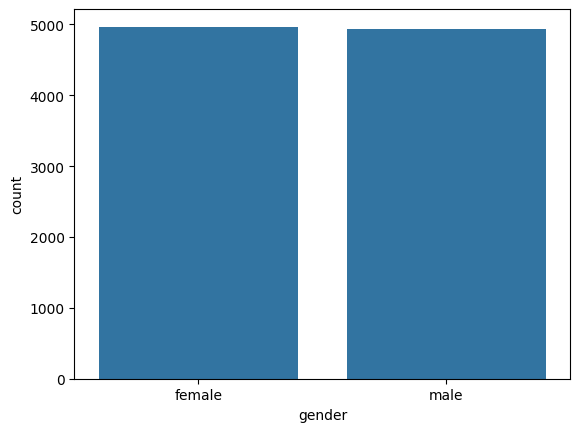

In [295]:
sns.countplot(data=claims, x="gender")
plt.show()